# Chapter 6: Learning Best Practices for Model Evaluation and Hyperparameter Tuning


In [88]:
from IPython.display import Image
%matplotlib inline

## Hyperparameter

A hyperparameter is a machine learning parameter whose value is chosen before a learning algorithm is trained

> Basically, anything in machine learning and deep learning that you decide their values or choose their configuration before training begins and whose values or configuration will remain the same when training ends is a hyperparameter.


The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it.

Examples of hyperparameters in machine learning include:



- Train-test split ratio
- The C and sigma hyperparameters for support vector machines.
- The learning rate for training a neural network.
- The k in k-nearest neighbors.
- Number of epochs
- Number of branches in a decision tree
- Number of clusters in a clustering algorithm
- Number of hidden layers in a nn
- Pooling size
- Batch size
- Choice of activation function in a neural network (nn) layer (e.g. Sigmoid, ReLU, Tanh)


In [120]:
# gamma and C are hyperparameters
#svm = SVC(kernel='rbf', random_state=1, gamma=0.02, C=1.0)
# svm.fit(X_train_std, y_train)

> We cannot know the best value for a model hyperparameter on a given problem. We may use rules of thumb, copy values used on other problems, or search for the best value by trial and error.



> When a machine learning algorithm is tuned for a specific problem, such as when you are using a grid search or a random search, then you are tuning the hyperparameters of the model or order to discover the parameters of the model that result in the most skillful predictions.



## Parameters

> Parameters on the other hand are internal to the model. That is, they are learned or estimated purely from the data during training as the algorithm used tries to learn the mapping between the input features and the labels or targets.


#### Exampls of models parameters

- The weights in an artificial neural network.
- The support vectors in a support vector machine.
- The coefficients in a linear regression or logistic regression

At the end of the learning process, model parameters are what constitute the model itself.


- parameters in machine learning and deep learning are the values your learning algorithm can change independently as it learns and these values are affected by the choice of hyperparameters you provide. So you set the hyperparameters before training begins and the learning algorithm uses them to learn the parameters. Behind the training scene, parameters are continuously being updated and the final ones at the end of the training constitute your model.

> Model hyperparameters are often referred to as model parameters which can make things confusing. A good rule of thumb to overcome this confusion is as follows:

- If you have to specify a model parameter manually then it is probably a model hyperparameter.

## Hyper-Parameter tunning

- setting the right hyperparameter values is very important because it directly impacts the performance of the model that will result from them being used during model training. 

- The process of choosing the best hyperparameters for your model is called hyperparameter tuning and in this chapter, model evaluation hyperparameter tuning.


More on the above: [here](https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac) and [here](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/), [here](https://www.quora.com/What-are-hyperparameters-in-machine-learning), [here](https://datascience.stackexchange.com/questions/14187/what-is-the-difference-between-model-hyperparameters-and-model-parameters)


## Model Evaluation

- Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses. 
  
- Model evaluation is important to assess the efficacy of a model during initial research phases, 
and it also plays a role in model monitoring

## Previous chapters

We learned about the essential machine learning algorithms for classification and how to get our data into shape before we feed it into those algorithms. 
- Chapter 1:  Ability to Learn
  
- Chapter 2: Training ML for Classification
  
- Chapter 3: Tour of ML classifiers using Sklearn
  
- Chapter 4: Building good training dataset
  
- Chapter 5: Compressing data via Dimensionality reduction


> Now, it’s time to learn about the best practices of building good machine learning models by fine-tuning the algorithms and evaluating the performance of the models. I

- Assess the performance of machine learning models 
  
- Diagnose the common problems of machine learning algorithms 
  
- Fine-tune machine learning models 
  
- Evaluate predictive models using different performance metrics

# Streamlining workflows with pipelines

- We will learn useful tool: Pipeline class in scikit-learn. 

- It allows us to fit a model including an arbitrary number of transformation steps and apply it to make predictions about new data.

## Loading the Breast Cancer Wisconsin dataset

- We will be working with the Breast Cancer Wisconsin dataset, which contains 569 examples of malignant and benign tumor cells. 

- The first two columns in the dataset store the unique ID numbers of the examples and the corresponding diagnoses (M = malignant, B = benign), respectively. 

- Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

### Reading the da

In [95]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# if the Breast Cancer dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df = pd.read_csv('wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [96]:
df.shape

(569, 32)

In [97]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<hr>

In [98]:
df.iloc[:, 1:2]

,1
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [99]:
(df.iloc[:, 1:2]).value_counts()

1
B    357
M    212
dtype: int64

Before moving to ML, what do we need to do with categorical variables?

<hr>

### Preprocessing the data

> we will assign the 30 features to a NumPy array, X. Using a LabelEncoder object, we will transform the class labels from their original string representation ('M' and 'B') into integers:

In [103]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

After encoding the class labels (diagnosis) in an array, y, the malignant tumors are now represented as class 1, and the benign tumors are represented as class 0, respectively. We can double-check this mapping by calling the transform method of the fitted LabelEncoder on two dummy class labels:

In [104]:
pd.DataFrame(y) 

,0
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [ ]:
le.transform(['M', 'B'])

<hr>

#### Dividing the dataset

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

Let us look our dataset, one more time before training a ML model !

In [106]:
pd.DataFrame(X_train).head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.1097,0.1506,0.17640,0.08235,0.3024,0.06949
1,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321
2,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492
3,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.1388,0.17000,0.10170,0.2369,0.06599
4,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592
5,10.180,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,0.06908,...,11.17,22.84,71.94,375.6,0.1406,0.1440,0.06572,0.05575,0.3055,0.08797
6,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,0.2036,0.07125,...,10.75,23.07,71.25,353.6,0.1233,0.3416,0.43410,0.08120,0.2982,0.09825
7,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.1368,0.3101,0.43990,0.22800,0.2268,0.07425
8,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130
9,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420


> Before moving to train a model. Can we just use the dataset as it is? If yes, why, if no why?

> How many features do we have? are they too much or we can reduce  the number of features?


## Combining transformers and estimators in a pipeline

- Since the features in the Breast Cancer Wisconsin dataset are measured on various different scales, we will standardize the columns in the Breast Cancer
  
- Lets assume that we want compress the data into a lower two-dimensional using Principal Component Analyis(PCA)

In [ ]:
df.shape[1]
# len(df.columns)

## Example training logistice Regression without Pipline

In [110]:
pd.DataFrame(pca_x_train)

,0,1
0,-2.849472,-0.934443
1,-0.523124,-0.215633
2,-1.692450,-0.230725
3,-1.528968,-1.587741
4,-3.177755,-0.857037
...,...,...
450,-1.183407,-1.940320
451,5.438707,-4.225971
452,0.443856,0.290561
453,4.264531,-4.790633


In [109]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    confusion_matrix,
    auc,
    roc_curve,
)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Better scale all features
sc_x = StandardScaler()
scalled_x_train = sc_x.fit_transform(X_train) # fit_transform(X_train)
scalled_x_test = sc_x.transform(X_test)  # transform(X_test)


# Reducting Dimention Using PCA
pca_x = PCA(n_components=2)
pca_x_train = pca_x.fit_transform(scalled_x_train)
pca_x_test = pca_x.transform(scalled_x_test)

# training a classifier
classifier = LogisticRegression(random_state=997).fit(pca_x_train, y_train)
# %%
y_pred = classifier.predict(pca_x_test)
# %%
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc(fpr, tpr)
# %%
print(f'Confusion Matrix:{confusion_matrix(y_test, y_pred)}')
print(f'F1 Score:{f1_score(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Confusion Matrix:[[71  1]
 [ 4 38]]
F1 Score:0.9382716049382716
Accuracy Score: 0.956140350877193
Recall Score: 0.9047619047619048


In [ ]:
auc(fpr, tpr)

## Example training logistice Regression using Pipline

- Pipeline of transforms with a final estimator.

> Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.



In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([('yaba', StandardScaler()), 
                ('PCA', PCA(n_components=2)),
                ("LR", LogisticRegression())])

# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

pipe.fit(X_train, y_train) # train the model on the training data
y_pred = pipe.predict(X_test) # predict
test_acc = pipe.score(X_test, y_test) # score
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


In [114]:
pipe

Pipeline(steps=[('yaba', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('LR', LogisticRegression())])

## Example training logistice Regression using make_pipeline()

> This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.



In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


        
pipe_lr = make_pipeline(SimpleImputer(strategy='mean'), # missing value
                        StandardScaler(), # scale values if categorical we can use One-hot encoding
                        PCA(n_components=2), # reduce dimensionality
                        LogisticRegression())

# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test) # predict
test_acc = pipe_lr.score(X_test, y_test) # score
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


In [116]:
pipe_lr

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

> The only difference is that make_pipeline generates names for steps automatically. But, ttep names are needed e.g. if you want to use a pipeline with model selection utilities (e.g. GridSearchCV Read more [here](https://stackoverflow.com/questions/40708077/what-is-the-difference-between-pipeline-and-make-pipeline-in-scikit)



- The make_pipeline function takes an arbitrary number of scikit-learn transformers (objects that support the fit and transform methods as input), followed by a scikit-learn estimator that implements the fit and predict methods. 


- If we call the fit method of Pipeline, the data will be passed down a series of transformers via fit and transform calls on these intermediate steps until it arrives at the estimator object (the final element in a pipeline). 

- The estimator will then be fitted to the transformed training data. 
  
- When we executed the fit method on the pipe_lr pipeline in the preceding code example, StandardScaler first performed fit and transform calls on the training data. Second, the transformed training data was passed on to the next object in the pipeline, PCA. Similar to the previous step, PCA also executed fit and transform on the scaled input data and passed it to the final element of the pipeline, the estimator.

- Finally, the LogisticRegression estimator was fit to the training data after it underwent transformations via StandardScaler and PCA. Again, we should note that there is no limit to the number of intermediate steps in a pipeline; however, if we want to use the pipeline for prediction tasks, the last pipeline element has to be an estimator. 



> Similar to calling fit on a pipeline, pipelines also implement a predict method if the last step in the pipeline is an estimator. If we feed a dataset to the predict call of a Pipeline object instance, the data will pass through the intermediate steps via transform calls. In the final step, the estimator object will then return a prediction on the transformed data.

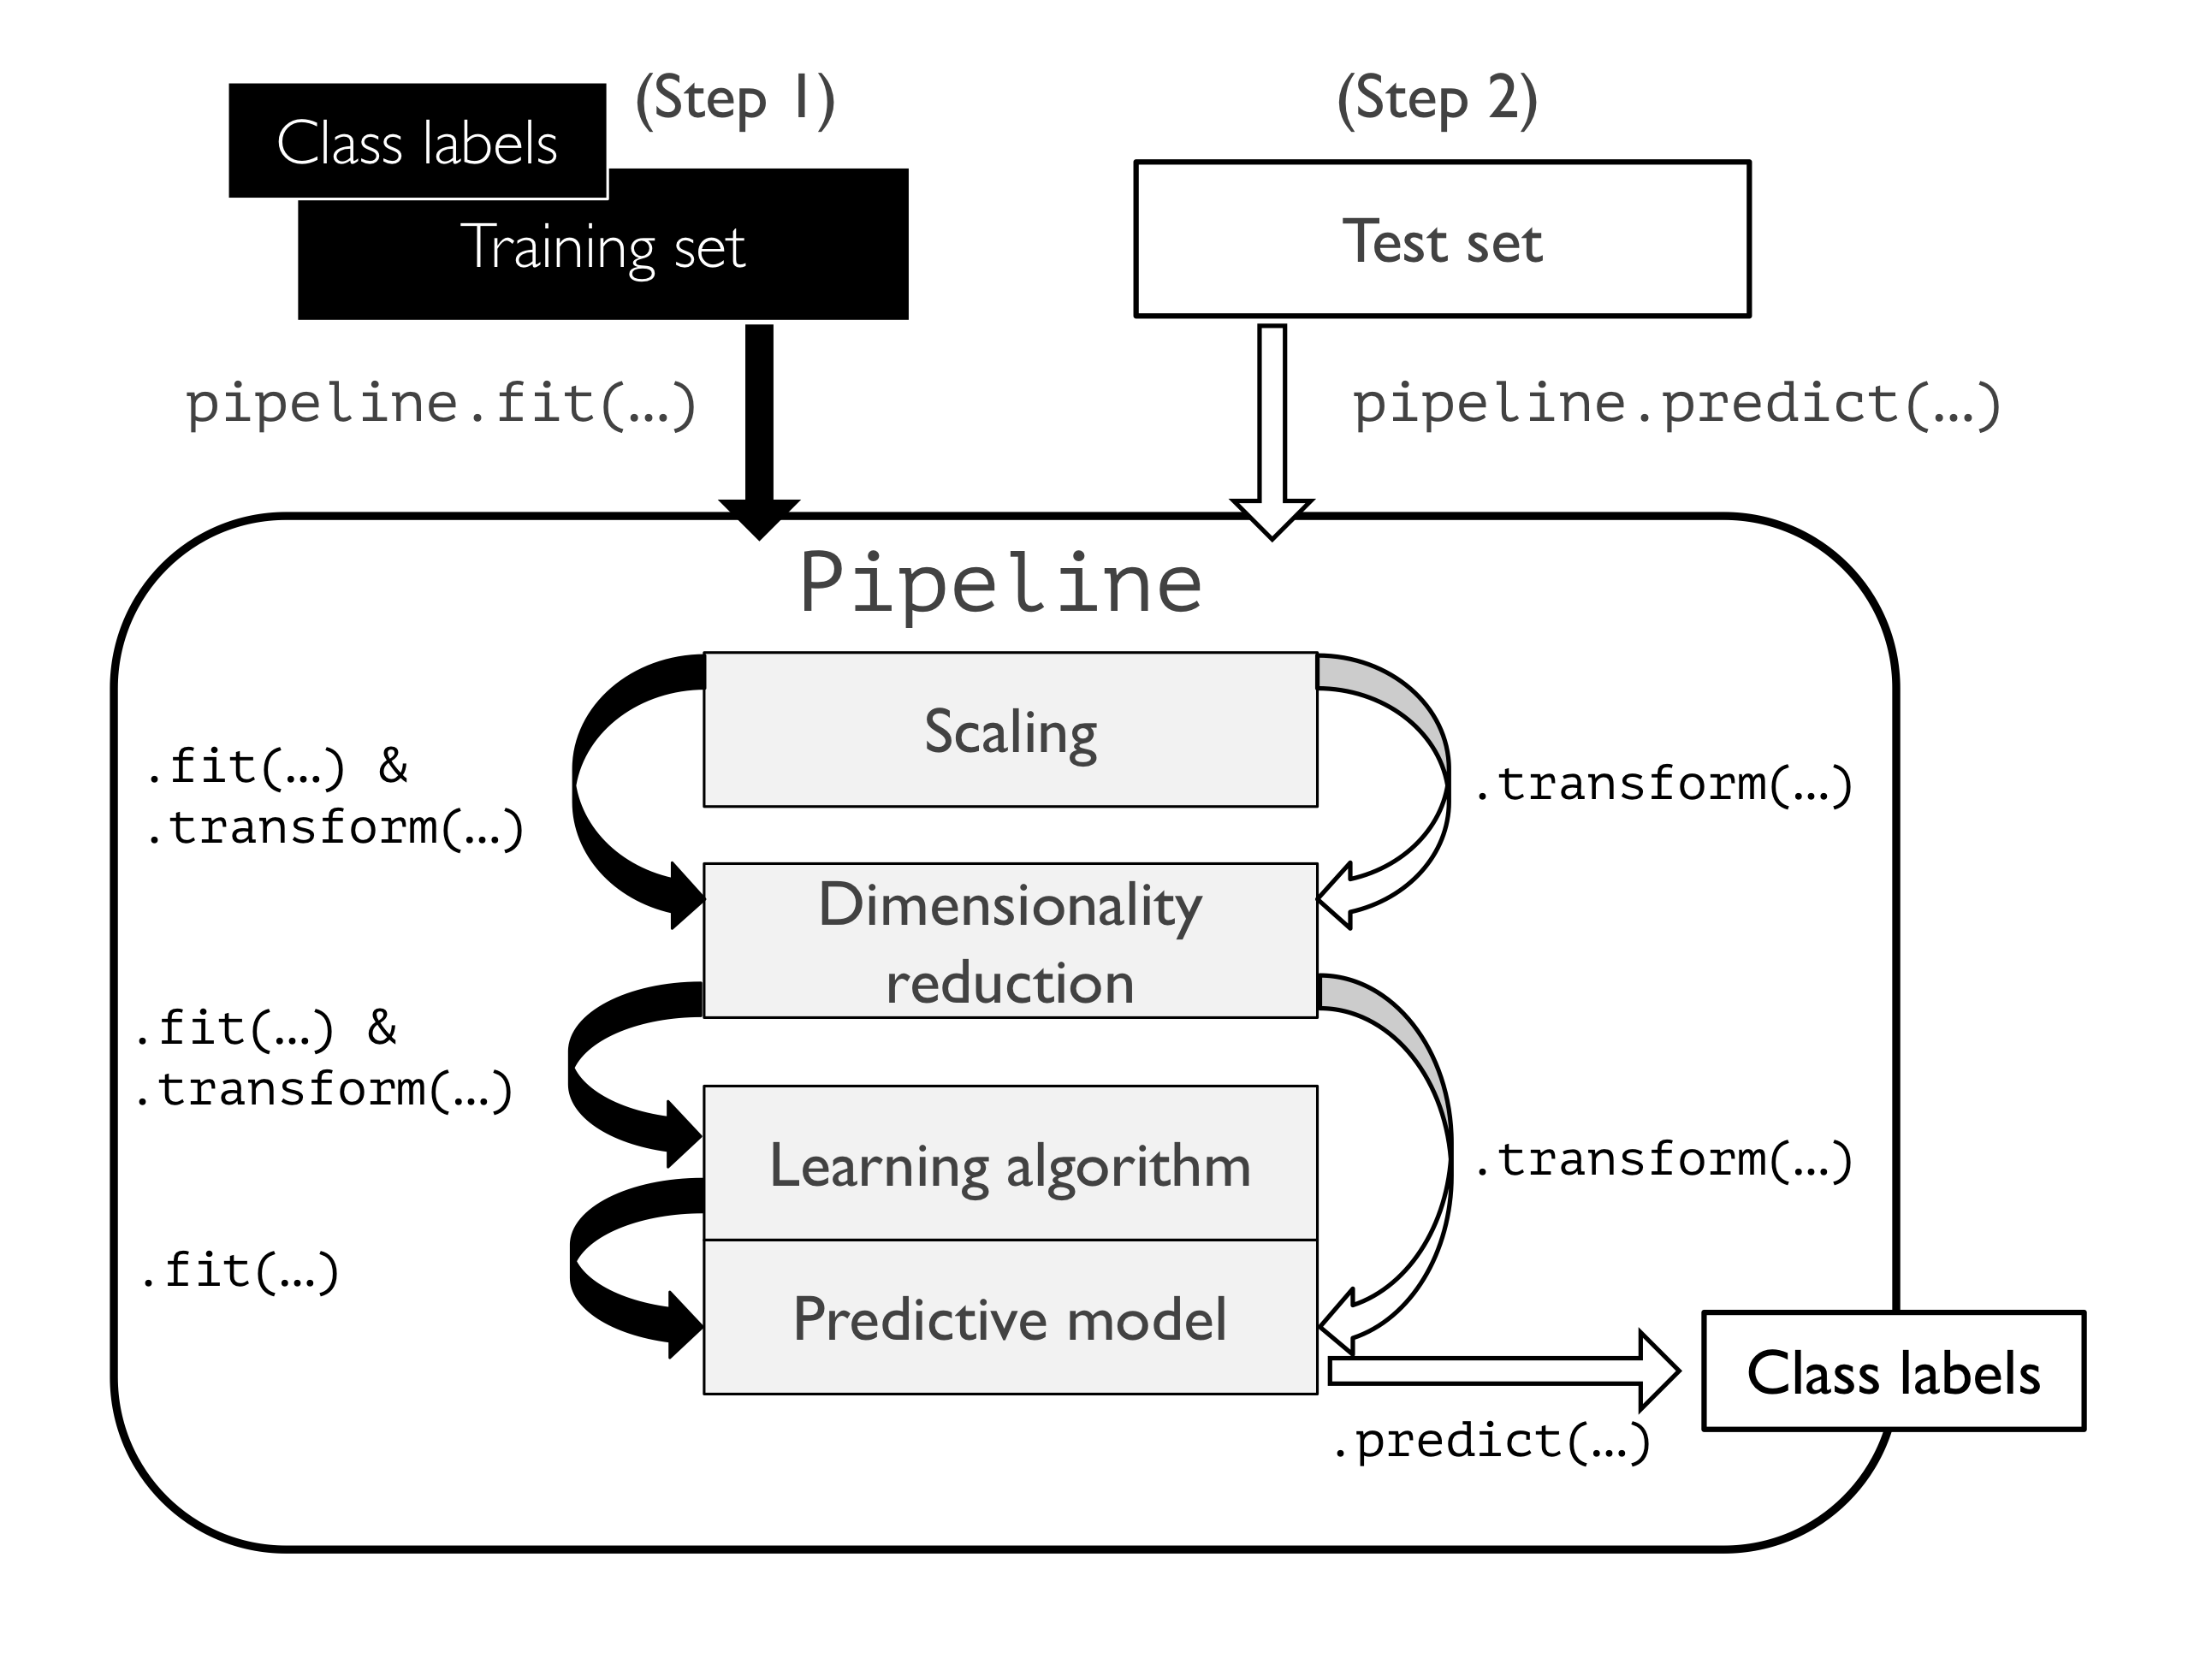

In [117]:
Image(filename='figures/06_01.png', width=500) 

## Categorical and Continue values

How can we preprocess data with both categorical and numeric?

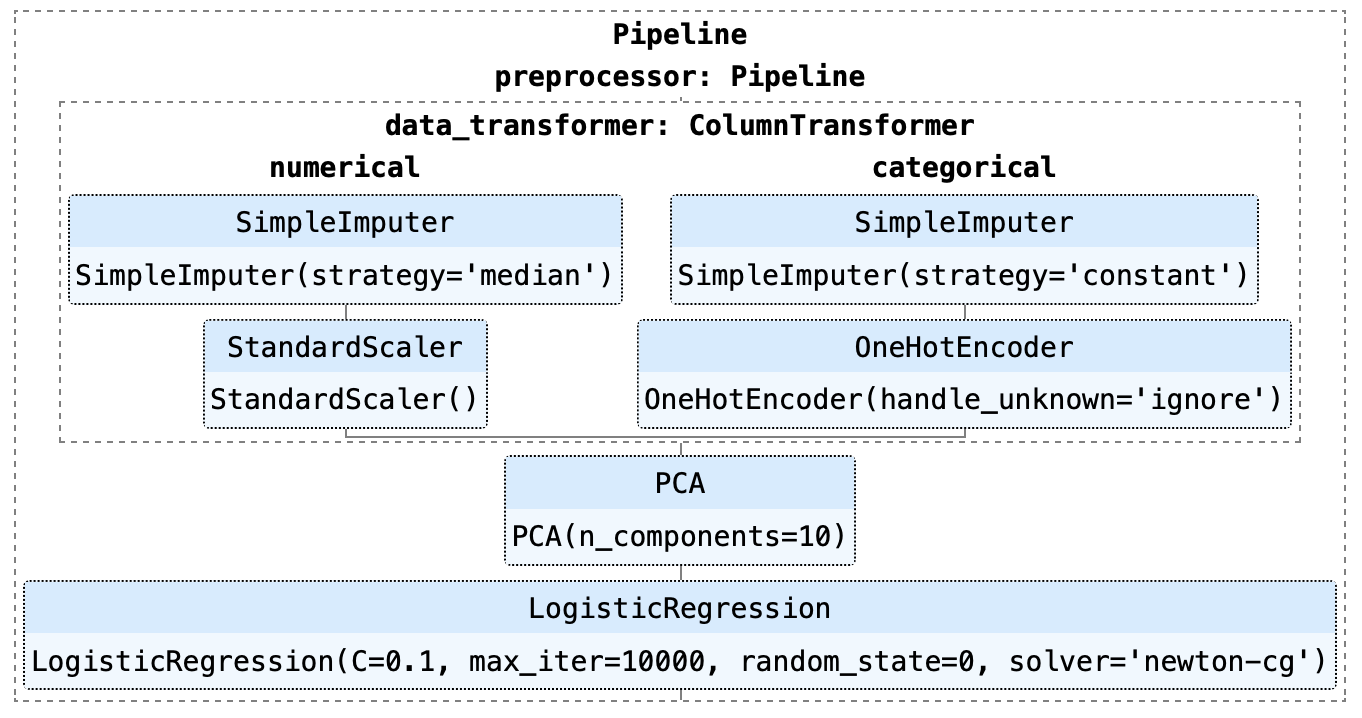

In [118]:
Image(filename='figures/workflow.png', width=500) 

Example : https://towardsdatascience.com/building-a-machine-learning-pipeline-3bba20c2352b

# Using k-fold cross validation to assess model performance

- Common cross-validation techniques 
  
  - holdout cross-validation 

  - k-fold cross-validation

- They help us to obtain reliable estimates of the model’s generalization performance, that is, how well the model performs on unseen data.

## The holdout method

![](2022-09-17-11-52-36.png)

- A classic and popular approach for estimating the generalization performance of machine learning models is the holdout method. Using the holdout method, we split our initial dataset into separate training and test datasets—the former is used for model training, and the latter is used to estimate its generalization performance

-  However, in typical machine learning applications, we are also interested in tuning and comparing different parameter settings to further improve the performance for making predictions on unseen data. This process is called model selection, with the name referring to a given classification problem for which we want to select the optimal values of tuning parameters (also called hyperparameters). 

-  However, if we reuse the same test dataset over and over again during model selection, it will become part of our training data and thus the model will be more likely to overfit. Despite this issue, many people still use the test dataset for model selection, which is not a good machine learning practice.

> A better way of using the holdout method for model selection is to separate the data into three parts: a training dataset, a validation dataset, and a test datase

![](2022-09-17-11-53-55.png)

> The training dataset is used to fit the different models, and the performance on the validation dataset is then used for model selectio

> A disadvantage of the holdout method is that the performance estimate may be very sensitive to how we partition the training dataset into the training and validation subsets; the estimate will vary for different examples of the data. k-fold cross-validation, where we repeat the holdout method k times on k subsets of the training data.

## K-fold cross-validation

- In k-fold cross-validation, we randomly split the training dataset into k folds without replacement. Here, k – 1 folds, the so-called training folds, are used for the model training, and one fold, the so-called test fold, is used for performance evaluation. 

- This procedure is repeated k times so that we obtain k models and performance estimates.

- We then calculate the average performance of the models based on the different, independent test folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data compared to the holdout method. 

In [ ]:
Image(filename='figures/06_03.png', width=700) 

Dont forget, we do this split on training data only.

![](2022-09-17-12-06-55.png)

### What happens after model selection?


- Once we have found satisfactory hyperparameter values, we can retrain the model on the complete training dataset and obtain a final performance estimate using the independent test dataset. 

- The rationale behind fitting a model to the whole training dataset after k-fold cross-validation is that first, we are typically interested in a single, final model (versus k individual models), and second, providing more training examples to a learning algorithm usually results in a more accurate and robust model.

## What are some more advantage of K-fold?

- Since k-fold cross-validation is a resampling technique without replacement, the advantage of this approach is that in each iteration, each example will be used exactly once, and the training and test folds are disjoint. 




> In summary, k-fold cross-validation makes better use of the dataset than the holdout method with a validation set, since in k-fold cross-validation all data points are being used for evaluation. A good standard value for k in k-fold cross-validation is 10.

### Stratified K-Fold cross validation

- A slight improvement over the standard k-fold cross-validation approach is stratified k-fold cross-validation, which can yield better bias and variance estimates, especially in cases of unequal class proportions, which has also been shown in the same study by Ron Kohavi referenced previously in this section. 
  
- In stratified cross-validation, the class label proportions are preserved in each fold to ensure that each fold is representative of the class proportions in the training dataset, which we will illustrate by using the StratifiedKFold iterator in scikit-learn:

![](2022-09-17-12-13-10.png)

### K-Fold Cross Validation in Python

> Scikit learn also implements a k-fold cross-validation scorer, which allows us to evaluate our model using stratified k-fold cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np

        
pipe_lr = make_pipeline(SimpleImputer(strategy='mean'), # missing value
                        StandardScaler(), # scale values if categorical we can use One-hot encoding
                        PCA(n_components=2), # reduce dimensionality
                        LogisticRegression())

# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test) # predict
test_acc = pipe_lr.score(X_test, y_test) # score
print(f'Test accuracy: {test_acc:.3f}')

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=10) # distribute across different cpu cores, n_jobs = 1, only one CPU
                         # n_jobs=-1, means use all available cores

print(f'CV accuracy scores: {scores}')


We can see we have 10 different score on each fold. We can find their mean and obtain a single score.

In [ ]:
print(f'CV accuracy: {np.mean(scores):.3f}')


Standard deviation

- The standard deviation is a measure of variation of the scores - it is the standard error of the score

In [ ]:
print(f'+/- {np.std(scores):.3f}')

In [ ]:
import multiprocessing

multiprocessing.cpu_count()

Reference : [A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/)



# Debugging algorithms with learning curves

- We will take a look at two very simple yet powerful diagnostic tools that can help us to improve the performance of a learning algorithm: learning curves and validation curves.

- We will discuss how we can use learning curves to diagnose whether a learning algorithm has a problem with overfitting (high variance) or underfitting (high bias). 
  
- Furthermore, we will take a look at validation curves, which can help us to address the common issues of learning algorithms.

## Diagnosing bias and variance problems with learning curves

- If a model is too complex for a given training dataset—for example, think of a very deep decision tree—the model tends to overfit the training data and does not generalize well to unseen data. Often, it can help to collect more training examples to reduce the degree of overfitting.

- However, in practice, it can often be very expensive or simply not feasible to collect more data. By plotting the model training and validation accuracies as functions of the training dataset size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem.

## Examples of Learning Curve and 

- The graph in the upper left shows a model with a high bias. This model has both low training and cross-validation accuracy, which indicates that it underfits the training data

- Common ways to address this issue are to increase the number of model parameters, for example, by collecting or constructing additional features, or by decreasing the degree of regularization, for example, in support vector machine (SVM) or logistic regression classifiers
 

In [ ]:
Image(filename='figures/06_04.png', width=600) 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

<br>
<br>

## Addressing over- and underfitting with validation curves

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

<br>
<br>

# Fine-tuning machine learning models via grid search

<br>
<br>

## Tuning hyperparameters via grid search 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


pipe_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1))

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]


rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

In [ ]:
rs = rs.fit(X_train, y_train)
print(rs.best_score_)

In [ ]:
print(rs.best_params_)

## Exploring hyperparameter configurations more widely with randomized search

In [ ]:
Image(filename='figures/06_11.png', width=600) 

In [ ]:
import scipy.stats


param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(10)

## More resource-efficient hyperparameter search with successive halving

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
hs = HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust',
    resource='n_samples',
    factor=1.5,
    random_state=1,
    n_jobs=-1)

In [ ]:
hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)

In [ ]:
clf = hs.best_estimator_
print(f'Test accuracy: {hs.score(X_test, y_test):.3f}')

<br>
<br>

## Algorithm selection with nested cross-validation

In [ ]:
Image(filename='figures/06_07.png', width=500) 

In [ ]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

<br>
<br>

# Looking at different performance evaluation metrics

...

## Reading a confusion matrix

In [ ]:
Image(filename='figures/06_08.png', width=300) 

In [ ]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

### Additional Note

Remember that we previously encoded the class labels so that *malignant* examples are the "postive" class (1), and *benign* examples are the "negative" class (0):

In [ ]:
le.transform(['M', 'B'])

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

Next, we printed the confusion matrix like so:

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

Note that the (true) class 0 examples that are correctly predicted as class 0 (true negatives) are now in the upper left corner of the matrix (index 0, 0). In order to change the ordering so that the true negatives are in the lower right corner (index 1,1) and the true positves are in the upper left, we can use the `labels` argument like shown below:

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

We conclude:

Assuming that class 1 (malignant) is the positive class in this example, our model correctly classified 71 of the examples that belong to class 0 (true negatives) and 40 examples that belong to class 1 (true positives), respectively. However, our model also incorrectly misclassified 1 example from class 0 as class 1 (false positive), and it predicted that 2 examples are benign although it is a malignant tumor (false negatives).

<br>
<br>

## Optimizing the precision and recall of a classification model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1: {f1_val:.3f}')

mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

In [ ]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

<br>
<br>

## Plotting a receiver operating characteristic

In [ ]:
from sklearn.metrics import roc_curve, auc
from numpy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

<br>
<br>

## The scoring metrics for multiclass classification

In [ ]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

## Dealing with class imbalance

In [ ]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [ ]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

In [ ]:
from sklearn.utils import resample

print('Number of class 1 examples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

In [ ]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [ ]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

<br>
<br>

# Summary

...

---

Readers may ignore the next cell.

In [ ]:
! python ../.convert_notebook_to_script.py --input ch06.ipynb --output ch06.py